# 4) Navigating through dimensions

In [1]:
import numpy as np

## NumPy documentation

**Note: Numpy has a very good and extensive documentation, which you can find at https://numpy.org/doc/stable/. If you need any further details about numpy arrays, you can always refer to it.**

## Multi-dimensional images as arrays

Let us import and inspect an multidimensional image:

In [2]:
import skimage.io
from matplotlib import pyplot as plt

image_multi = skimage.io.imread('https://github.com/guiwitz/microfilm/raw/master/demodata/coli_nucl_ori_ter.tif')

image_multi.shape

(3, 30, 220, 169)

Now this image has more than just rows and columns of pixels. In total, we have 4 dimensions, the last two corresponding to y and x coordinates. The two first correspond to different channels (3) and time-points (30). If we want to access and plot a partial 2D image, we have to use indexing. For example, let's display the 2nd channel of the 6th time point:

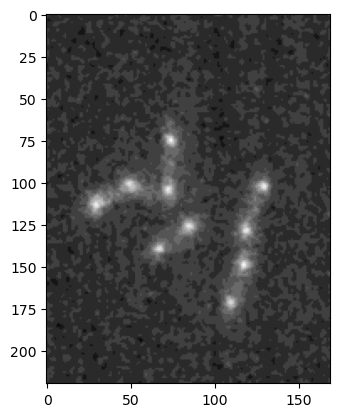

In [3]:
im_singleplane = image_multi[1, 5].copy()

plt.imshow(im_singleplane, cmap='gray')

Note that we additionally **used the ```copy``` method**. This ensures that whatever modification we make to the cropped version doesn't affect the original image! We will do this often in the future, so it is good to remember.

### Cropping

A common operation is to only consider part of an image for further analysis. We have learned in the previous chapters that we could use slicing to extract only part of an array which for an image is called cropping. For example, we might want to focus on the rows around 110 and columns around 50:

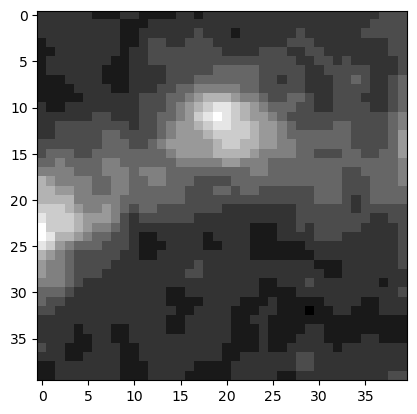

In [4]:
im_crop = im_singleplane[90:130, 30:70].copy()
plt.imshow(im_crop, cmap='gray')

We can also check again the size of this cropped image. We expect it to be a square of 40x40 pixels (given the slicing numbers we used above):

In [5]:
im_crop.shape

(40, 40)

### Operations on images

All the operations we have seen for arrays in general are of course still valid for images. So we can do simple calculus or apply functions to images. Let's first print the cropped image again and then see how the operations change the pixel values:

In [6]:
im_crop

array([[100, 100, 100, ..., 101, 101, 101],
       [100, 100, 100, ..., 101, 101, 101],
       [100, 100, 100, ..., 101, 101, 101],
       ...,
       [100, 100, 100, ..., 100, 100, 100],
       [ 99,  99, 100, ..., 100, 100, 100],
       [ 99,  99, 100, ..., 100, 101, 101]], shape=(40, 40), dtype=uint16)

In [7]:
im_crop + 3

array([[103, 103, 103, ..., 104, 104, 104],
       [103, 103, 103, ..., 104, 104, 104],
       [103, 103, 103, ..., 104, 104, 104],
       ...,
       [103, 103, 103, ..., 103, 103, 103],
       [102, 102, 103, ..., 103, 103, 103],
       [102, 102, 103, ..., 103, 104, 104]], shape=(40, 40), dtype=uint16)

In [8]:
im_crop * 3

array([[300, 300, 300, ..., 303, 303, 303],
       [300, 300, 300, ..., 303, 303, 303],
       [300, 300, 300, ..., 303, 303, 303],
       ...,
       [300, 300, 300, ..., 300, 300, 300],
       [297, 297, 300, ..., 300, 300, 300],
       [297, 297, 300, ..., 300, 303, 303]], shape=(40, 40), dtype=uint16)

In [9]:
np.log10(im_crop)

array([[2.       , 2.       , 2.       , ..., 2.0043213, 2.0043213,
        2.0043213],
       [2.       , 2.       , 2.       , ..., 2.0043213, 2.0043213,
        2.0043213],
       [2.       , 2.       , 2.       , ..., 2.0043213, 2.0043213,
        2.0043213],
       ...,
       [2.       , 2.       , 2.       , ..., 2.       , 2.       ,
        2.       ],
       [1.9956352, 1.9956352, 2.       , ..., 2.       , 2.       ,
        2.       ],
       [1.9956352, 1.9956352, 2.       , ..., 2.       , 2.0043213,
        2.0043213]], shape=(40, 40), dtype=float32)

### Projections (aggregating functions over dimensions)

When handling images, the ```min```, ```max``` are very relevant as they implement the common **projections** that one often performs on multi-dimensional data. For example we can project all time-points on a single plane using mean intensity projection. Using the original multidimensional image again (remember that we did not change it since we always created copies to manipulate), we would write:

In [10]:
im_proj = np.mean(image_multi, axis=1)

As we have aggregated over the time dimension, we now have a 3D image (2 spatial dimensions plus channels). The time-axis has been compressed to a single plane:

In [11]:
print("Shape of the original image:", image_multi.shape)
print("Shape after projection:", im_proj.shape)

Shape of the original image: (3, 30, 220, 169)
Shape after projection: (3, 220, 169)


Finally, let us display the first channel of the projected image:

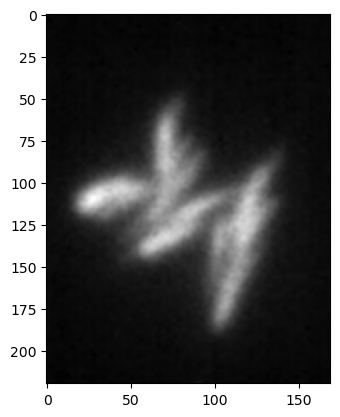

In [12]:
plt.imshow(im_proj[0], cmap='gray')

### Operations *between* images/arrays

As with any arrays, we can of course also perform operations between images. For example, we could create an image containing "noise" and add it to an image. Like this we can test the quality of a denoising algorithm.

First we create a noise image with the same shape as the original image:

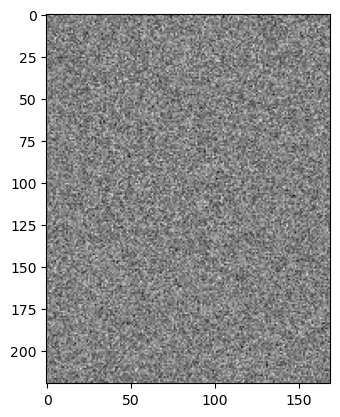

In [13]:
im_noise = np.random.normal(0, 1, im_singleplane.shape)
plt.imshow(im_noise, cmap='gray')

Then we simply add the noise image to the original image:

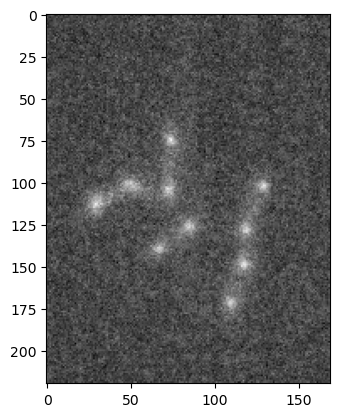

In [14]:
im_singleplane_noisy = im_singleplane + im_noise

plt.imshow(im_singleplane_noisy, cmap='gray')

### Image processing operations

In addition to the standard mathematical operations provided by Numpy, we can apply operations which are specifically designed for images. Such functions are typically provided by libraries like scikit-image.

A classical example is the blurring of an image using a Gaussian filter:

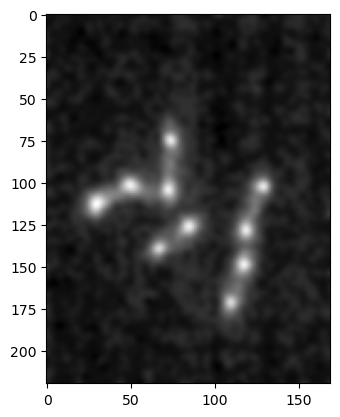

In [15]:
im_gauss = skimage.filters.gaussian(im_singleplane, sigma=2, preserve_range=True)
plt.imshow(im_gauss, cmap='gray');

### Masking/thresholding

Finally, we have seen that we can create boolean arrays by applying logical operations to arrays. In the world of images, this is typically used to thereshold an image, i.e. extracting only parts of the image which have an intensity higher that a given threshold.

For example on the blurred image above, we can extract all pixels which have an intensity higher than 103:

In [16]:
im_thresholded = im_gauss > 103
im_thresholded

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], shape=(220, 169))

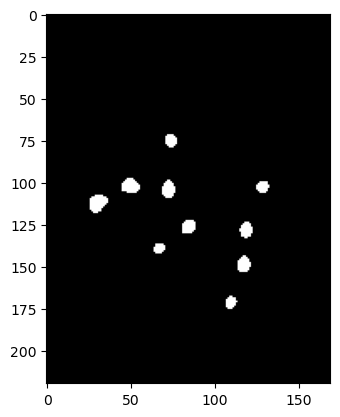

In [17]:
plt.imshow(im_thresholded, cmap='gray')

We see that we obtain a boolean array that we can still plot using ```imshow``` and that gives us a binary image with bright regions (above 103) shown as white (```True```) and darker ones as black (```False```).

With the right threshold value, we can extract the regions of interest in an image - like the cell bodies in this fluorescence image.

## Rearranging and extending dimensions

Let us load another image:

Shape of the image: (2550, 3825, 3)
Data type of the image: uint8
Value range of the image: 0 to 255


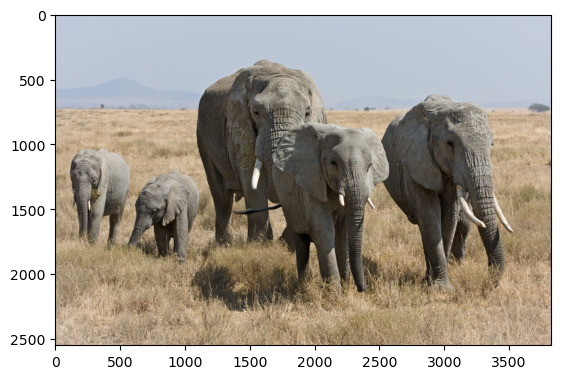

In [18]:
image = skimage.io.imread("https://upload.wikimedia.org/wikipedia/commons/5/5b/Serengeti_Elefantenherde1.jpg?download")

print("Shape of the image:", image.shape)
print("Data type of the image:", image.dtype)
print("Value range of the image:", image.min(), "to", image.max())
plt.imshow(image)

### Playing with the colour channels

As you can see, in RGB images, the three channels are stored in the last dimension. This is different from the previous image, where the channels were stored in the first dimension. We can rearrange the colour channels by indexing:

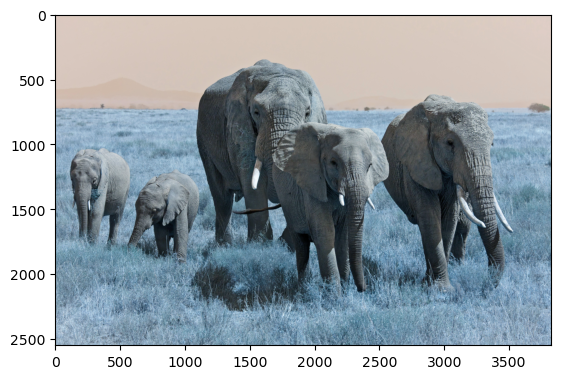

In [19]:
image_recolor = image[:, :, [2, 1, 0]]
plt.imshow(image_recolor)

Or we could remove the blue signal by setting it to zero:

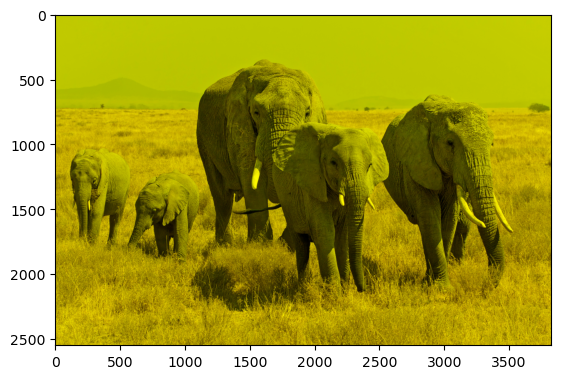

In [20]:
image_no_blue = image.copy()
image_no_blue[:, :, 2] = 0
plt.imshow(image_no_blue)

Or we could extract only the red channel, and then stack it again to an RGB image (think about why it is now only gray):

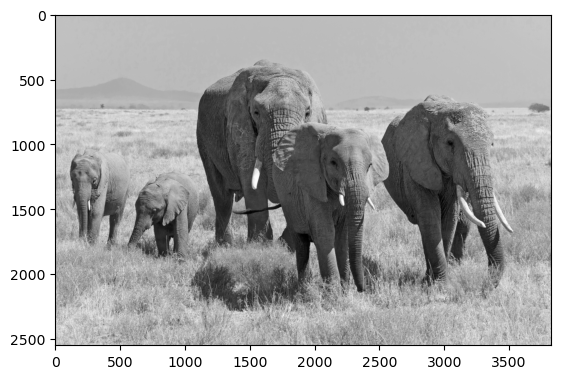

In [21]:
red_channel = image[:, :, 0]
rgb_only_red = np.stack((red_channel, red_channel, red_channel), axis=-1)

plt.imshow(rgb_only_red)

### Manipulating the spatial dimensions

Let's flip the image along the horizontal axis. Instead of using negative steps in slicing, we now use the ```flip``` function from Numpy (sometimes there are multiple ways to one solution):

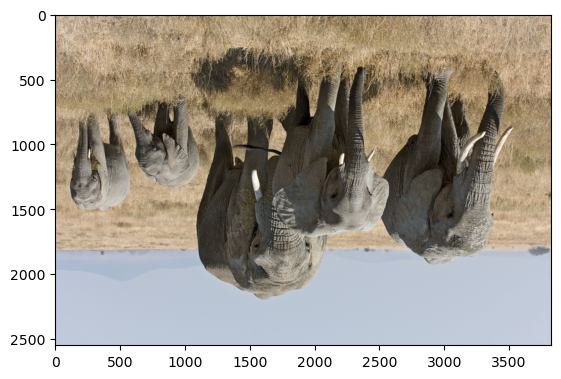

In [22]:
flipped = np.flip(image, axis=0)
plt.imshow(flipped)

Next, let us concatenate the flipped image with the original one along the horizontal axis. We can use the ```concatenate``` function from Numpy for this:

Shape of the combined image: (5100, 3825, 3)


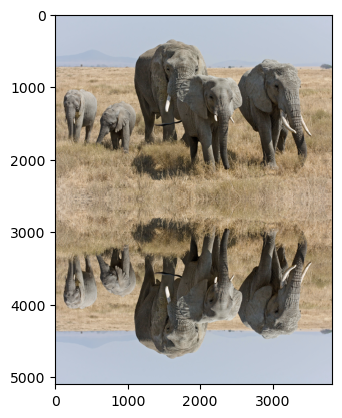

In [23]:
combined = np.concatenate((image, flipped), axis=0)
print("Shape of the combined image:", combined.shape)
plt.imshow(combined)

Finally, we can also rotate the original image by 90 degrees by moving the spatial axes around. This is done using the ```moveaxis``` function from Numpy:

Shape after reshaping: (3825, 2550, 3)


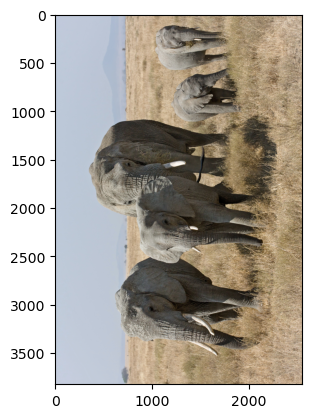

In [24]:
rotated = np.moveaxis(image, 0, 1)
print("Shape after reshaping:", rotated.shape)

plt.imshow(rotated)

## Further

Image processing and computer vision is an entire field of research outside the scope of this introductory course. Common next steps are object detection, measurements, tracking etc. For an introduction to image processing you can check the course [Image processing for beginners](https://github.com/guiwitz/PyImageCourse_beginner) on GitHub.

# Exercises

In these exercises, you will work on an image that shows a glacier, taken with a satellite, in the years 2021 and 2022. It is an RGB image, i.e. it has 3 channels (red, green and blue).
The goal is to do a simple **computational analysis of the image** to answer the question **whether the area of the glacier has changed**.

More background information: https://www.copernicus.eu/en/news/news/observer-monitoring-glaciers-space

1. **Load the following image** into a numpy array, print its shape and display the image: https://www.copernicus.eu/sites/default/files/inline-images/Picture6_8.jpg

2. **Remove the writing** on the top by saving an image slice beginning from row 70 in a new variable. Display the slice to confirm that we have a good crop.

3. Next, we want to analyse the **surface of the glacier**. We consider this to be the **white area** in the image. All pixels that exceed a certain **threshold** shall be considered white. So create a **mask** in which all pixels contain `True` where the pixel value is greater than 200.

4. Since we have an RGB image, there are 3 channels (red, green and blue), this also reflects in the shape of the mask created above. With `np.all()` (another aggregating function) we can apply the **mask to all 3 channels together** to extract the white area. More precisely it means that we generate a 2D boolean image that is only `True` where the values are **above the threshold in all 3 channels**. You can then show the result with `plt.imshow()`.

    *Hint: use `white = np.all(mask, axis=-1)`*

5. (Optional) In many scientific contexts, it is crucial whether **ice areas have a certain minimum size**. To extract these, we can remove small, unconnected areas. We can use the function `skimage.morphology.opening()` for this purpose (for details, see below). Again display the result.

    *Hint: use `skimage.morphology.opening(white)`*

6. Now split the extracted boolean snow image into a **part showing 2021 and one for 2022**, respectively (just create 2 crops along the middle and save them in variables).

7. Calculate the **area of the glacier** in 2021 and 2022 by counting the number of pixels that are `True` in the respective images. You can simply use `np.sum()` for this. Print it and make a **conclusion about the change** in the glacier area.


---


*Details on `skimage.morphology.opening()`: This function first removes a few pixels from the edge of all areas and then adds the same number of pixels to the result. The effect is that small areas are deleted because after the pixels have been removed there is no area left to which pixels could be added again. The result is a **mask** that only contains areas with a certain minimum size. Even more information you can find in the [documentation](https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.opening)*

In [36]:

### YOUR CODE HERE

path = "https://www.copernicus.eu/sites/default/files/inline-images/Picture6_8.jpg"
i = skimage.io.imread(path)
print("Shape:", i.shape)


Shape: (652, 1047, 3)


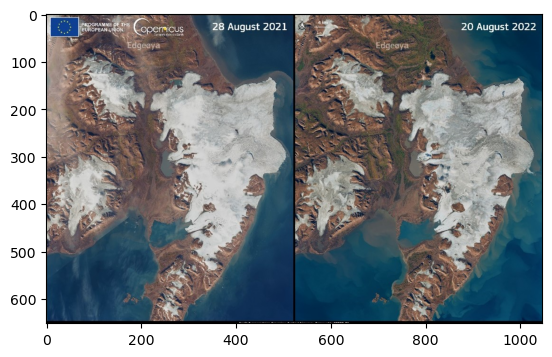

In [30]:
plt.imshow(i)

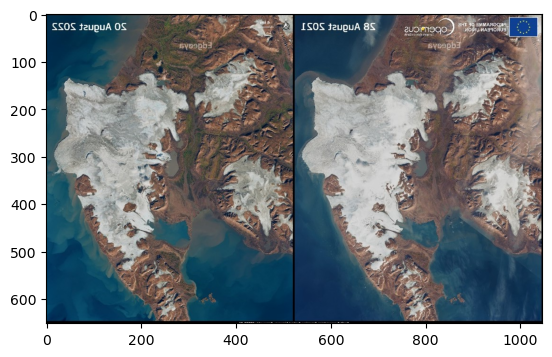

In [32]:
plt.imshow(np.flip(i,1))

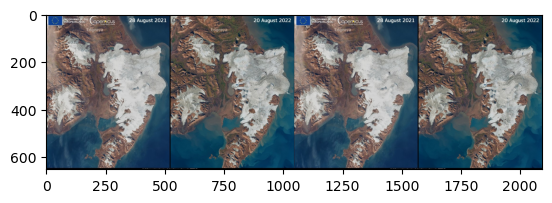

In [40]:
plt.imshow(np.concatenate([i,i],1))

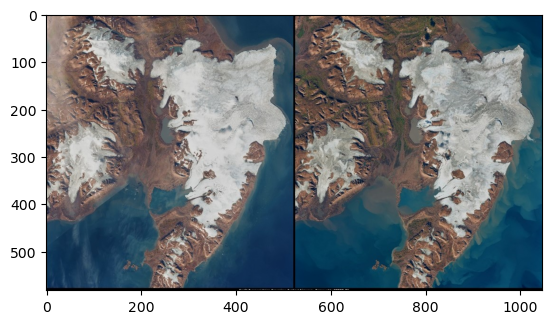

In [51]:
# 2. **Remove the writing** on the top by saving an image slice beginning from row 70 in a new variable. Display the slice to confirm that we have a good crop.

j = i[70::,::,::]
plt.imshow(j)

In [67]:
# 3. Next, we want to analyse the **surface of the glacier**. We consider this to be the **white area** in the image. All pixels that exceed a certain **threshold** shall be considered white. So create a **mask** in which all pixels contain `True` where the pixel value is greater than 200.

m = j.copy()
m[m < 150] = 0

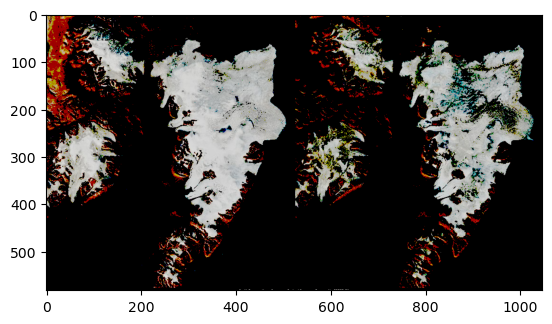

In [68]:
plt.imshow(m)

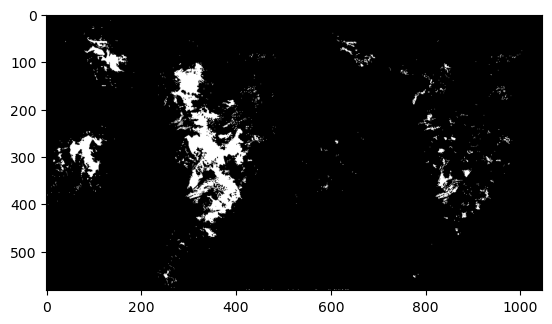

In [71]:
# 4. Since we have an RGB image, there are 3 channels (red, green and blue), this also reflects in the shape of the mask created above. With `np.all()` (another aggregating function) we can apply the **mask to all 3 channels together** to extract the white area. More precisely it means that we generate a 2D boolean image that is only `True` where the values are **above the threshold in all 3 channels**. You can then show the result with `plt.imshow()`.

# *Hint: use `white = np.all(mask, axis=-1)`*

mask = j > 200
white = np.all(mask, axis=-1)
plt.imshow(white, cmap="gray")

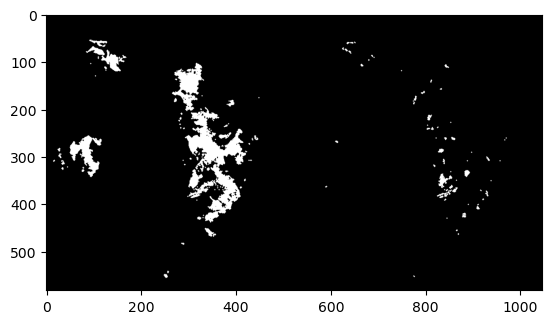

In [72]:
uwhite = skimage.morphology.opening(white)
plt.imshow(uwhite, cmap="gray")

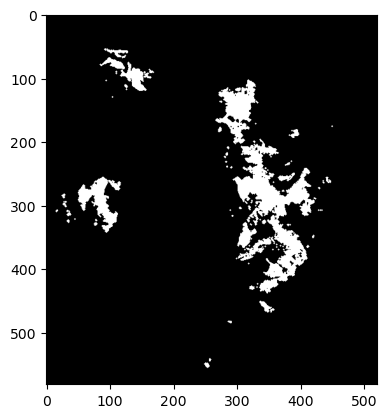

In [86]:
# 6. Now split the extracted boolean snow image into a **part showing 2021 and one for 2022**, respectively (just create 2 crops along the middle and save them in variables).
uwhite.shape
h21 = uwhite[:,:520]
h22 = uwhite[:,520:]
plt.imshow(h21, cmap="gray")


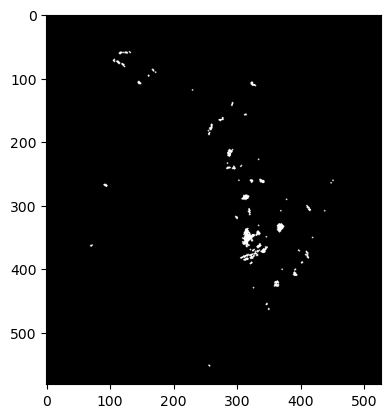

In [85]:
plt.imshow(h22, cmap="gray")

In [91]:
# 7. Calculate the **area of the glacier** in 2021 and 2022 by counting the number of pixels that are `True` in the respective images. You can simply use `np.sum()` for this. Print it and make a **conclusion about the change** in the glacier area.

sh21 = np.sum(h21)
sh22 = np.sum(h22)
print("2021:", sh21)
print("2022:", sh22)
print("Decrease:", round(100 - (sh22 / sh21 * 100), 2),"%")

2021: 18948
2022: 1723
Decrease: 90.91 %
